In [81]:
"""
A recreation of Ng's ML coursera excercise 1: Linear Regression
"""
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = np.loadtxt('ex1data1.txt', delimiter=',')
X = np.matrix(data[:, 0]).T
y = np.matrix(data[:, 1]).T

# The dataset:

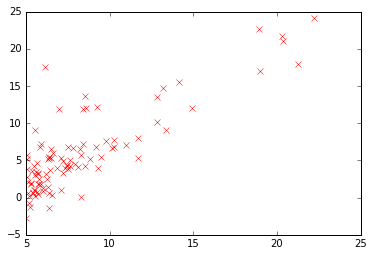

In [82]:
plt.plot(X, y, 'rx')

# Performing gradient descent to find the optimal value of theta. 

We could also use the normal equation (X'X)^-1 * X'*y but that is less educational

In [83]:
m, _ = np.shape(X)
X = np.concatenate([np.ones((m, 1)), X], axis=1)
theta = np.zeros((2, 1))

def cost(theta, X, y):
    error = (X.dot(theta) - y)
    return error.T.dot(error) / (2 * m)

def grad(alpha, theta, m, X, y): 
    error = (X.dot(theta) - y)
    theta -= (alpha/m) * error.T.dot(X).T
    return theta

iterations = 300
alpha = 0.01
costs = []
for step in range(iterations):
    if step % 10 == 0:
        costs.append(cost(theta, X, y)[0, 0])
    theta = grad(alpha, theta, m, X, y)

# The cost curve as we do gradient descent:

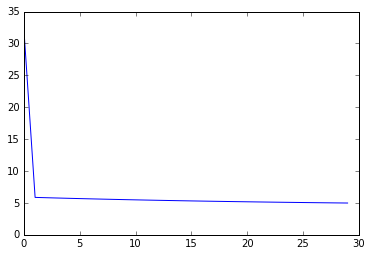

In [84]:
plt.plot(costs)

# We now have a linear model of the data:

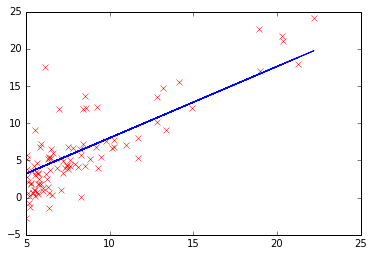

In [85]:
model = lambda x: x.dot(theta)
plt.plot(X[:, 1], y, 'rx')
plt.plot(X[:, 1], model(X))

In [86]:
size = 100
theta = np.zeros((2, 1))
theta0_vals = np.zeros((size, size))
theta1_vals = np.zeros((size, size))
J_vals = np.zeros((size, size))
zero_steps = np.linspace(-40, 40, size)
one_steps = np.linspace(-8.5, 11.5, size)

for zero_index, theta0 in enumerate(zero_steps):
    for one_index, theta1 in enumerate(one_steps):
        theta[0, 0] = theta0
        theta[1, 0] = theta1
        theta0_vals[zero_index, one_index] = theta0
        theta1_vals[zero_index, one_index] = theta1
        J_vals[zero_index, one_index] = cost(theta, X, y)

# The square-error surface of our linear model:

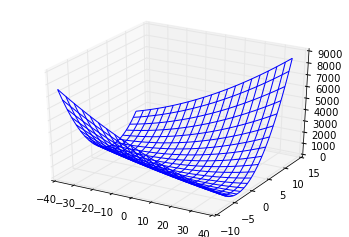

In [87]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(theta0_vals, theta1_vals, J_vals, rstride=5, cstride=5)
plt.show()

# It seems like ipython can only either display inline figures or 
# interactive figure in separate windows, but not both in a notebook. :(

# IsoErrors
(This section is a personal exploration, not included in the Ng course.)

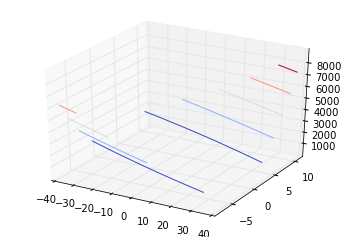

In [88]:
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cset = ax.contour(theta0_vals, theta1_vals, J_vals, 5, cmap=cm.coolwarm)
ax.clabel(cset, fontsize=9, inline=1)
plt.show()

Each curve on the above plot is an 'isoerror' curve -- it represents theta values which give the same squared error.
We can extract those curves from the contour set. Each point on the curves represent values for the theta parameter 
which we can then plot to see the space of models with the same squared error.

It tooks quite a while to figure out the datastructure of the cset, as it's pyplot internals 
that are not fully documented. This SO question plus some persistent guessing eventually allowed 
me to figure it out: https://stackoverflow.com/questions/19418901/get-coordinates-from-the-contour-in-matplotlib


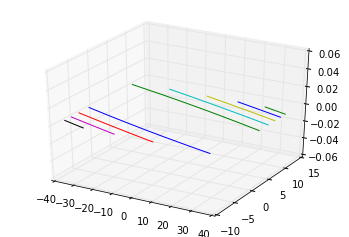

In [89]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for segment in cset.allsegs:
    xs0 = segment[0][:, 0]
    ys0 = segment[0][:, 1]
    ax.plot(xs0, ys0, 0)
    
    # segment[0] represents one set of contours, segment[1] the other. These are, roughly, the left and right side
    # of the graph. Notably, the sets are not the same size.
    try:
        xs1 = segment[1][:, 0]
        ys1 = segment[1][:, 1]
        ax.plot(xs1, ys1, 0)
    except IndexError:
        pass


# IsoError models

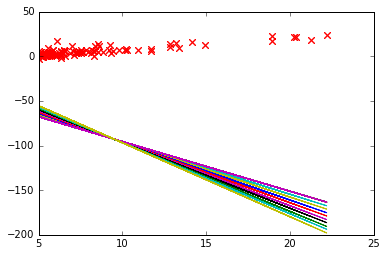

In [90]:
# Varying the value of SEGMENT will plot iso-error models from different curves in the squared error contour set.
SEGMENT = 2
segment_one = cset.allsegs[SEGMENT][0]
for index in range(0, len(segment_one), 5):
    t1 = segment_one[0].reshape(2, 1)
    t2 = segment_one[index].reshape(2, 1)

    error_model = lambda x, theta: x.dot(theta)  # theta: 2 x 1, 
    plt.plot(X[:, 1], y, 'rx')
    plt.plot(X[:, 1], error_model(X, t1))
    plt.plot(X[:, 1], error_model(X, t2))
